In [ ]:
from google.colab import files
uploaded = files.upload()

Saving loan_data_train.csv to loan_data_train.csv


### **The dataset is Bank Loan Interest Rate and the purpose is to find the parameters affecting the loan interest rates for applicants based on their personal information**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
loan = pd.read_csv("loan_data_train.csv",sep=',')
loan.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2199 non-null   float64
 1   Amount.Requested                2199 non-null   object 
 2   Amount.Funded.By.Investors      2199 non-null   object 
 3   Interest.Rate                   2200 non-null   object 
 4   Loan.Length                     2199 non-null   object 
 5   Loan.Purpose                    2199 non-null   object 
 6   Debt.To.Income.Ratio            2199 non-null   object 
 7   State                           2199 non-null   object 
 8   Home.Ownership                  2199 non-null   object 
 9   Monthly.Income                  2197 non-null   float64
 10  FICO.Range                      2200 non-null   object 
 11  Open.CREDIT.Lines               2196 non-null   object 
 12  Revolving.CREDIT.Balance        21

In [ ]:
loan = loan.rename(columns={'Amount.Requested':'amount_requested','Loan.Purpose':'loan_purpose','Home.Ownership':'home_ownership','Amount.Funded.By.Investors':'amount_funded','Interest.Rate':'int_rate','Loan.Length':'loan_len','Debt.To.Income.Ratio':'debt_ratio','Open.CREDIT.Lines':'credit_lines','Revolving.CREDIT.Balance':'credit_balance','FICO.Range':'FICO_range','Employment.Length':'emplt_len','Monthly.Income':'monthly_income','Inquiries.in.the.Last.6.Months':'inquiries'})
#change the column from object to numeric
loan["credit_balance"]=pd.to_numeric(loan.credit_balance,errors='coerce')
loan["amount_funded"]=pd.to_numeric(loan.amount_funded,errors='coerce')
loan["amount_requested"]=pd.to_numeric(loan.amount_requested,errors='coerce')
loan["credit_lines"]=pd.to_numeric(loan.credit_lines,errors='coerce')

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                2199 non-null   float64
 1   amount_requested  2195 non-null   float64
 2   amount_funded     2196 non-null   float64
 3   int_rate          2200 non-null   object 
 4   loan_len          2199 non-null   object 
 5   loan_purpose      2199 non-null   object 
 6   debt_ratio        2199 non-null   object 
 7   State             2199 non-null   object 
 8   home_ownership    2199 non-null   object 
 9   monthly_income    2197 non-null   float64
 10  FICO_range        2200 non-null   object 
 11  credit_lines      2193 non-null   float64
 12  credit_balance    2195 non-null   float64
 13  inquiries         2197 non-null   float64
 14  emplt_len         2131 non-null   object 
dtypes: float64(7), object(8)
memory usage: 257.9+ KB


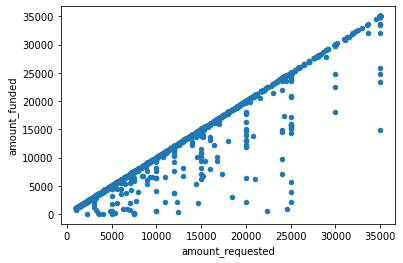

In [ ]:
loan.plot(kind="scatter", x="amount_requested", y="amount_funded") #has collinearity therefore the amount requested will be dropped

In [ ]:
loan.drop(['ID'],axis = 1, inplace = True) #column ID is an indicator and no use for modeling
loan.drop(['State'],axis = 1, inplace = True)
loan.drop(['amount_requested'],axis = 1, inplace = True)

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   amount_funded   2196 non-null   float64
 1   int_rate        2200 non-null   object 
 2   loan_len        2199 non-null   object 
 3   loan_purpose    2199 non-null   object 
 4   debt_ratio      2199 non-null   object 
 5   home_ownership  2199 non-null   object 
 6   monthly_income  2197 non-null   float64
 7   FICO_range      2200 non-null   object 
 8   credit_lines    2193 non-null   float64
 9   credit_balance  2195 non-null   float64
 10  inquiries       2197 non-null   float64
 11  emplt_len       2131 non-null   object 
dtypes: float64(5), object(7)
memory usage: 206.4+ KB


In [ ]:
loan['int_rate'] = pd.to_numeric(loan['int_rate'].str[:-1]).div(100) #change the type of interest rate and debt ratio from object to numeric
loan['debt_ratio'] = pd.to_numeric(loan['debt_ratio'].str[:-1]).div(100)
loan['FICO'] = loan['FICO_range'].agg(lambda x:x[:3]) #add a new column to choose one of the two figures from the original column
loan["FICO"]=pd.to_numeric(loan.FICO, errors='coerce') #change the type of FICO from object to numeric
loan.drop(['FICO_range'],axis = 1, inplace = True)
loan.head()

,amount_funded,int_rate,loan_len,loan_purpose,debt_ratio,home_ownership,monthly_income,credit_lines,credit_balance,inquiries,emplt_len,FICO
0,25000.00,0.1849,60 months,debt_consolidation,0.2756,MORTGAGE,8606.56,11.0,15210.0,3.0,5 years,720
1,19750.00,0.1727,60 months,debt_consolidation,0.1339,MORTGAGE,6737.50,14.0,19070.0,3.0,4 years,710
2,2100.00,0.1433,36 months,major_purchase,0.0350,OWN,1000.00,13.0,893.0,1.0,< 1 year,690
3,28000.00,0.1629,36 months,credit_card,0.1962,MORTGAGE,7083.33,12.0,38194.0,1.0,10+ years,710
4,17431.82,0.1223,60 months,credit_card,0.2379,MORTGAGE,5833.33,6.0,31061.0,2.0,10+ years,730


In [ ]:
loan.loan_len.value_counts()

36 months    1722
60 months     476
.               1
Name: loan_len, dtype: int64

In [ ]:
loan['loan_len'] = loan.loan_len.str.replace('months', '').str.strip()
loan["loan_len"]=pd.to_numeric(loan.loan_len, errors='coerce')

In [ ]:
loan['loan_len'].replace('.','NA', inplace=True)
loan['loan_len'].fillna('36', inplace=True)

In [ ]:
loan["loan_len"]=pd.to_numeric(loan.loan_len, errors='coerce') #change the type of loan length from object to numeric
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   amount_funded   2196 non-null   float64
 1   int_rate        2200 non-null   float64
 2   loan_len        2200 non-null   float64
 3   loan_purpose    2199 non-null   object 
 4   debt_ratio      2199 non-null   float64
 5   home_ownership  2199 non-null   object 
 6   monthly_income  2197 non-null   float64
 7   credit_lines    2193 non-null   float64
 8   credit_balance  2195 non-null   float64
 9   inquiries       2197 non-null   float64
 10  emplt_len       2131 non-null   object 
 11  FICO            2200 non-null   int64  
dtypes: float64(8), int64(1), object(3)
memory usage: 206.4+ KB


In [ ]:
loan['emplt_len'] = loan.emplt_len.str.replace('years', '').str.replace('year', '').str.replace('< 1','0.5').str.replace('+','').str.strip() #to classify the employment length
loan.emplt_len.sort_values().unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


array(['.', '0.5', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9', nan],
      dtype=object)

In [ ]:
loan['emplt_len'].replace('.','NA', inplace=True)
loan["emplt_len"]=pd.to_numeric(loan.emplt_len, errors='coerce') #change the type of employment length from object to numeric
loan.head()

,amount_funded,int_rate,loan_len,loan_purpose,debt_ratio,home_ownership,monthly_income,credit_lines,credit_balance,inquiries,emplt_len,FICO
0,25000.00,0.1849,60.0,debt_consolidation,0.2756,MORTGAGE,8606.56,11.0,15210.0,3.0,5.0,720
1,19750.00,0.1727,60.0,debt_consolidation,0.1339,MORTGAGE,6737.50,14.0,19070.0,3.0,4.0,710
2,2100.00,0.1433,36.0,major_purchase,0.0350,OWN,1000.00,13.0,893.0,1.0,0.5,690
3,28000.00,0.1629,36.0,credit_card,0.1962,MORTGAGE,7083.33,12.0,38194.0,1.0,10.0,710
4,17431.82,0.1223,60.0,credit_card,0.2379,MORTGAGE,5833.33,6.0,31061.0,2.0,10.0,730


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   amount_funded   2196 non-null   float64
 1   int_rate        2200 non-null   float64
 2   loan_len        2200 non-null   float64
 3   loan_purpose    2199 non-null   object 
 4   debt_ratio      2199 non-null   float64
 5   home_ownership  2199 non-null   object 
 6   monthly_income  2197 non-null   float64
 7   credit_lines    2193 non-null   float64
 8   credit_balance  2195 non-null   float64
 9   inquiries       2197 non-null   float64
 10  emplt_len       2130 non-null   float64
 11  FICO            2200 non-null   int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 206.4+ KB


In [ ]:
loan.describe()

,amount_funded,int_rate,loan_len,debt_ratio,monthly_income,credit_lines,credit_balance,inquiries,emplt_len,FICO
count,2196.000000,2200.000000,2200.000000,2199.000000,2197.000000,2193.000000,2195.000000,2197.000000,2130.000000,2200.000000
mean,12077.803406,0.130512,41.192727,0.153711,5727.459290,10.081623,15335.575399,0.898498,5.418075,706.084091
std,7775.331949,0.041733,9.884607,0.075205,4073.529708,4.497992,18720.803212,1.219223,3.534169,35.263185
min,-0.010000,0.054200,36.000000,0.000000,588.500000,2.000000,0.000000,0.000000,0.500000,640.000000
25%,6000.000000,0.101600,36.000000,0.097350,3458.000000,7.000000,5600.500000,0.000000,2.000000,680.000000
50%,10000.000000,0.131100,36.000000,0.152200,5000.000000,9.000000,11011.000000,0.000000,5.000000,700.000000
75%,16218.750000,0.158000,36.000000,0.206750,6883.330000,13.000000,18835.500000,1.000000,10.000000,725.000000
max,35000.000000,0.248900,60.000000,0.349100,102750.000000,38.000000,270800.000000,9.000000,10.000000,830.000000


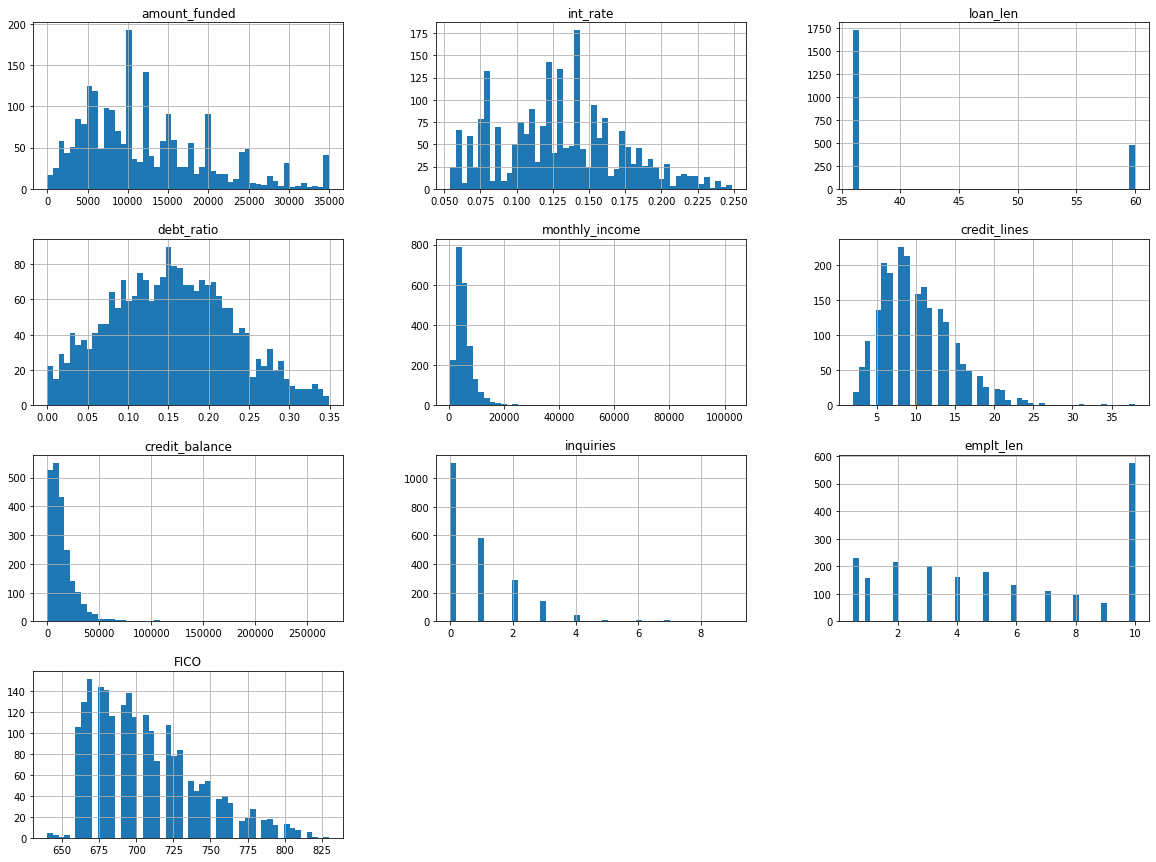

In [ ]:
import matplotlib.pyplot as plt
loan.hist(bins=50, figsize=(20,15))
plt.show()

Stratified Sampling

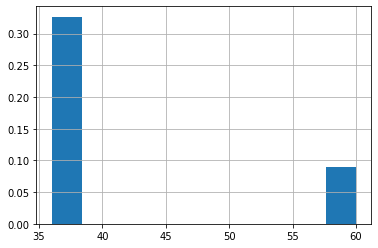

In [ ]:
loan.loan_len.hist(density=True)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit #creating the test set

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=2)
for train_index, test_index in split.split(loan, loan["loan_len"]):
  strat_train_set = loan.loc[train_index]
  strat_test_set = loan.loc[test_index]

In [ ]:
loan_explore = strat_train_set.copy()
loan_explore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1760 entries, 483 to 202
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   amount_funded   1756 non-null   float64
 1   int_rate        1760 non-null   float64
 2   loan_len        1760 non-null   float64
 3   loan_purpose    1759 non-null   object 
 4   debt_ratio      1759 non-null   float64
 5   home_ownership  1760 non-null   object 
 6   monthly_income  1757 non-null   float64
 7   credit_lines    1753 non-null   float64
 8   credit_balance  1756 non-null   float64
 9   inquiries       1757 non-null   float64
 10  emplt_len       1702 non-null   float64
 11  FICO            1760 non-null   int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 178.8+ KB


Correlations and Pairplot

In [ ]:
corr_matrix = loan_explore.corr() #correlations
corr_matrix

,amount_funded,int_rate,loan_len,debt_ratio,monthly_income,credit_lines,credit_balance,inquiries,emplt_len,FICO
amount_funded,1.000000,0.332581,0.380375,0.068809,0.355879,0.181604,0.259032,-0.058299,0.169542,0.083266
int_rate,0.332581,1.000000,0.406494,0.163085,0.003507,0.078387,0.055262,0.167998,0.047439,-0.704232
loan_len,0.380375,0.406494,1.000000,0.006266,0.058537,0.033205,0.028814,0.046436,0.066550,0.033155
debt_ratio,0.068809,0.163085,0.006266,1.000000,-0.184267,0.371744,0.186109,0.007540,0.026819,-0.215724
monthly_income,0.355879,0.003507,0.058537,-0.184267,1.000000,0.148308,0.346485,0.039931,0.106117,0.130148
credit_lines,0.181604,0.078387,0.033205,0.371744,0.148308,1.000000,0.281719,0.099833,0.085011,-0.074997
credit_balance,0.259032,0.055262,0.028814,0.186109,0.346485,0.281719,1.000000,0.010493,0.132606,-0.005664
inquiries,-0.058299,0.167998,0.046436,0.007540,0.039931,0.099833,0.010493,1.000000,-0.028634,-0.089969
emplt_len,0.169542,0.047439,0.066550,0.026819,0.106117,0.085011,0.132606,-0.028634,1.000000,0.031608
FICO,0.083266,-0.704232,0.033155,-0.215724,0.130148,-0.074997,-0.005664,-0.089969,0.031608,1.000000


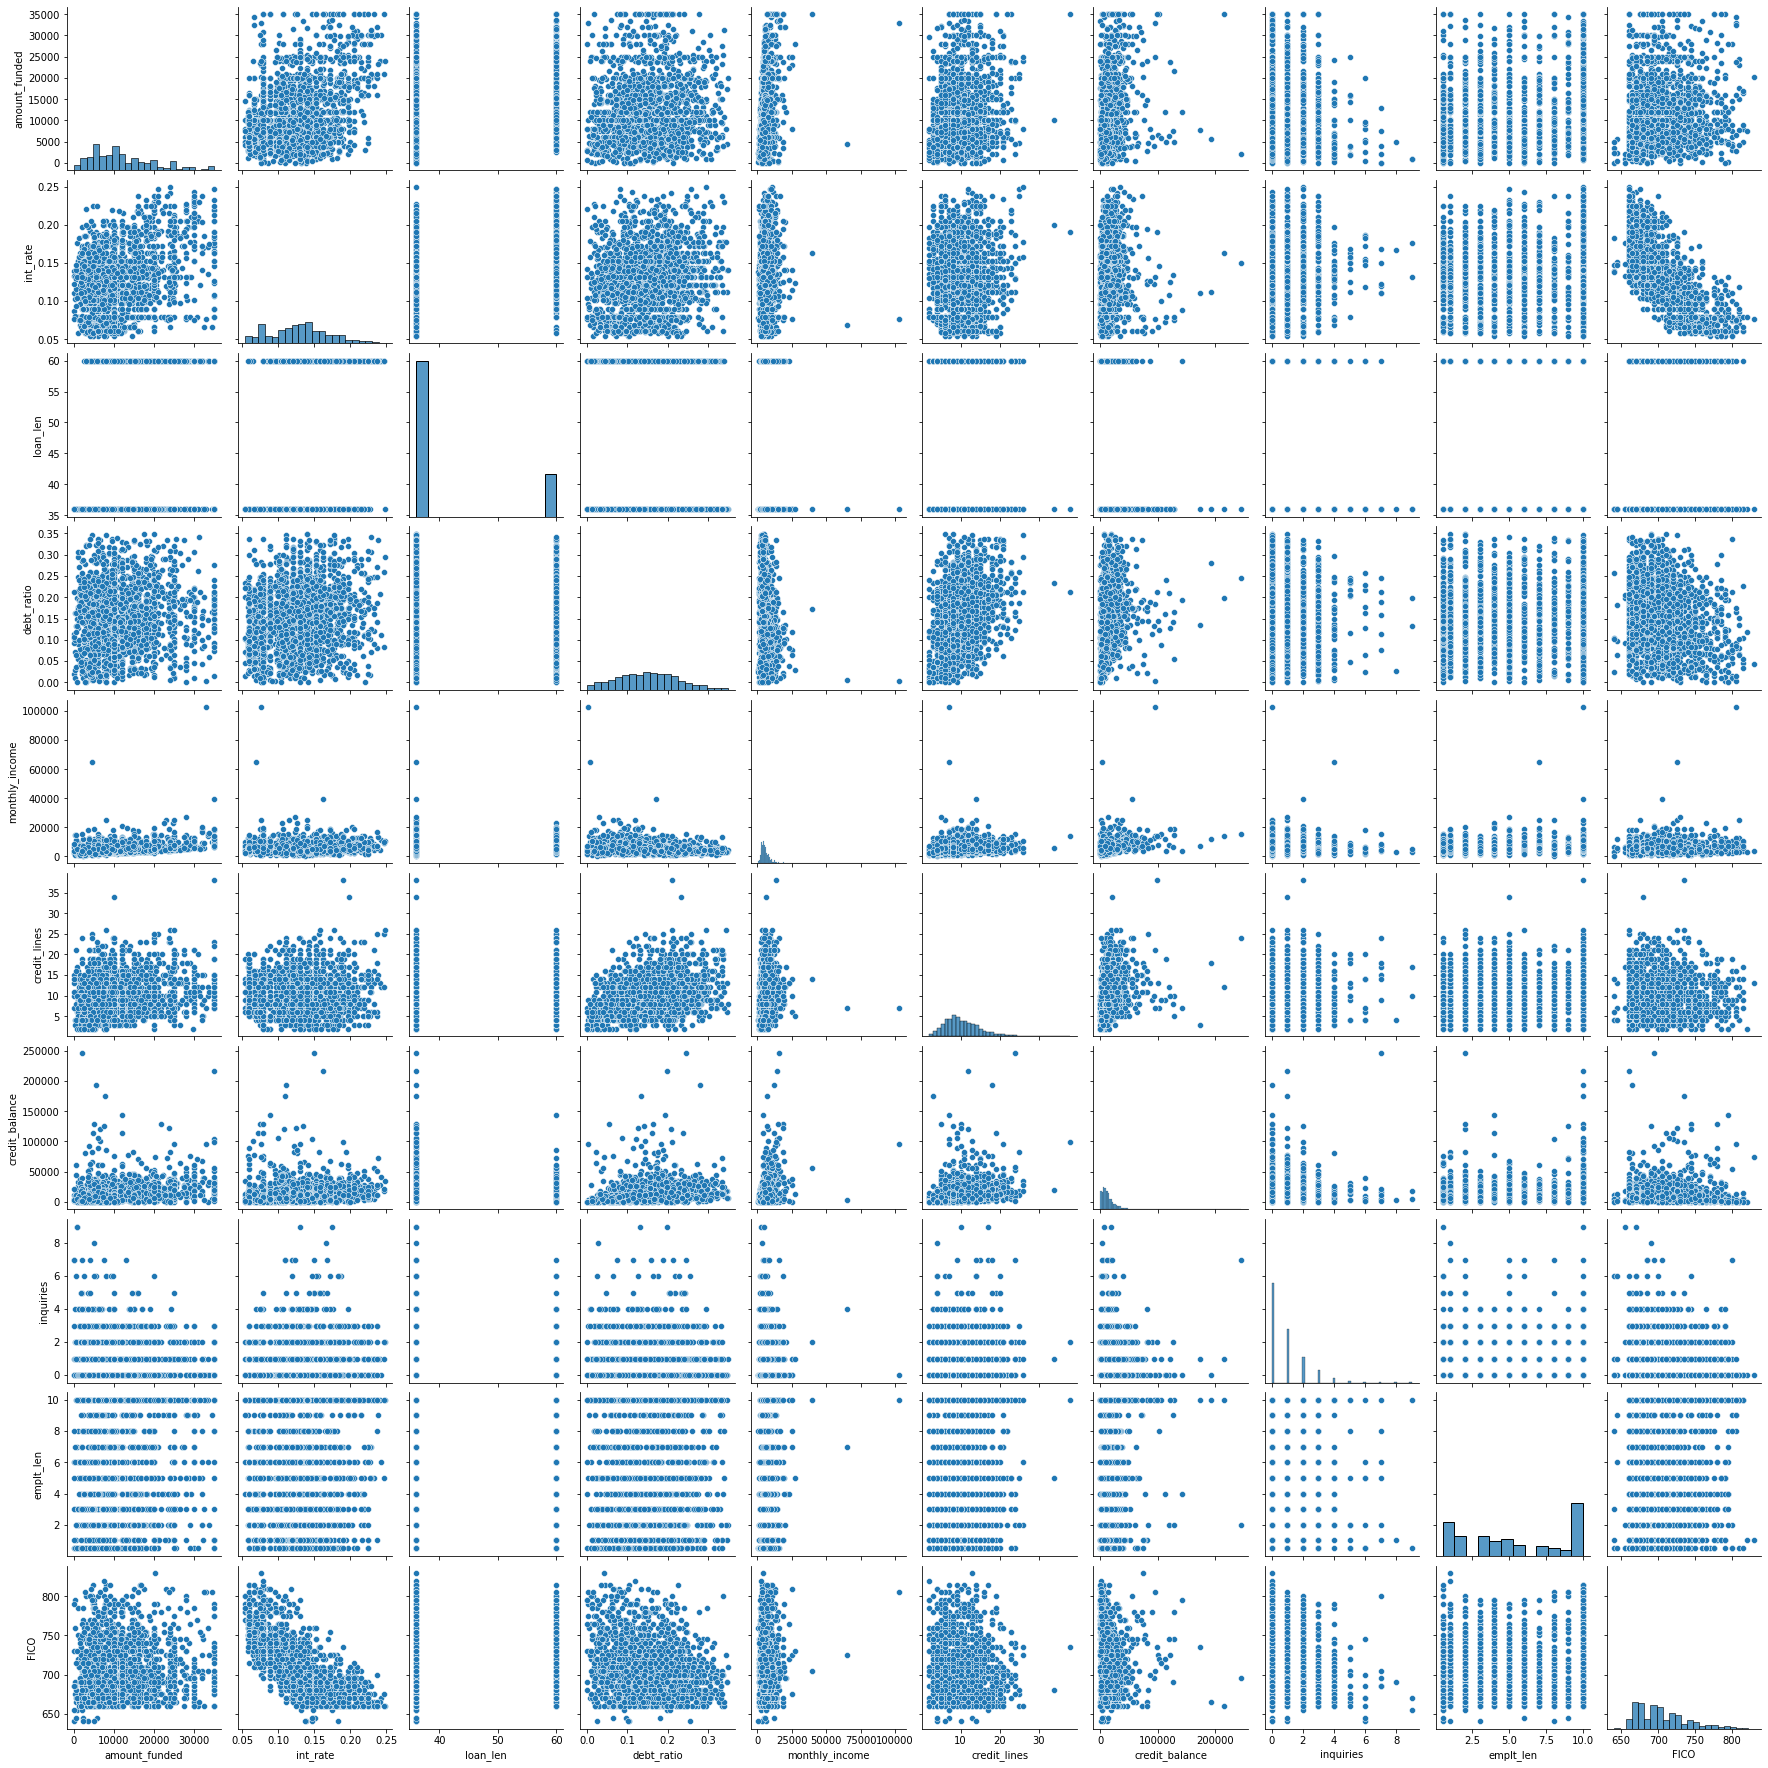

In [ ]:
import seaborn as sns
sns.pairplot(loan_explore)
plt.show()

**Data Cleaning**

In [ ]:
null_counts = loan_explore.isnull().sum() #check the total null for each columns
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
amount_funded      4
int_rate           0
loan_len           0
loan_purpose       1
debt_ratio         1
home_ownership     0
monthly_income     3
credit_lines       7
credit_balance     4
inquiries          3
emplt_len         58
FICO               0
dtype: int64


In [ ]:
loan_explore.loan_purpose.sort_values().unique()

array(['car', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding', nan], dtype=object)

In [ ]:
loan_explore = loan_explore.dropna(subset=['loan_purpose'])
loan_explore.loan_purpose.sort_values().unique()

array(['car', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding'], dtype=object)

In [ ]:
loan_explore.home_ownership.value_counts()

RENT        808
MORTGAGE    799
OWN         147
OTHER         4
NONE          1
Name: home_ownership, dtype: int64

In [ ]:
loan_explore= loan_explore.replace('NONE', np.nan).dropna(axis=0, subset=['home_ownership'])
loan_explore.home_ownership.value_counts()

RENT        808
MORTGAGE    799
OWN         147
OTHER         4
Name: home_ownership, dtype: int64

In [ ]:
loan_labels = loan_explore["int_rate"].copy() #to separate the predictors and the labels
loan_explore = loan_explore.drop("int_rate", axis=1)

For numeric attributes

In [ ]:
from sklearn.impute import SimpleImputer #to replace each numerical attribute's missing values with the median of that attribute
imputer = SimpleImputer(strategy="median")

In [ ]:
loan_num = loan_explore.drop(["loan_purpose","home_ownership"], axis=1)

In [ ]:
imputer.fit(loan_num)
imputer.statistics_

array([1.0000e+04, 3.6000e+01, 1.5200e-01, 5.0000e+03, 9.0000e+00,
       1.1092e+04, 0.0000e+00, 5.0000e+00, 7.0000e+02])

In [ ]:
X = imputer.transform(loan_num)
loan_tr = pd.DataFrame(X, columns=loan_num.columns,index=loan_num.index)

In [ ]:
loan_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1758 entries, 483 to 202
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   amount_funded   1758 non-null   float64
 1   loan_len        1758 non-null   float64
 2   debt_ratio      1758 non-null   float64
 3   monthly_income  1758 non-null   float64
 4   credit_lines    1758 non-null   float64
 5   credit_balance  1758 non-null   float64
 6   inquiries       1758 non-null   float64
 7   emplt_len       1758 non-null   float64
 8   FICO            1758 non-null   float64
dtypes: float64(9)
memory usage: 137.3 KB


For text attributes

In [ ]:
from sklearn.preprocessing import OneHotEncoder #convert loan purpose and home ownership as categorical values into one-hot vectors
loan_purpose=loan_explore[["loan_purpose"]]
home_ownership=loan_explore[["home_ownership"]]

loan_purpose_encoder = OneHotEncoder()
home_ownership_encoder= OneHotEncoder()

loan_purpose_1hot = loan_purpose_encoder.fit_transform(loan_purpose)
home_ownership_1hot = home_ownership_encoder.fit_transform(home_ownership)

loan_purpose_1hot

<1758x14 sparse matrix of type '<class 'numpy.float64'>'
	with 1758 stored elements in Compressed Sparse Row format>

In [ ]:
loan_purpose_encoder.categories_

[array(['car', 'credit_card', 'debt_consolidation', 'educational',
        'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
        'other', 'renewable_energy', 'small_business', 'vacation',
        'wedding'], dtype=object)]

In [ ]:
home_ownership_encoder.categories_

[array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object)]

In [ ]:
loan_purpose_1hot.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [ ]:
home_ownership_1hot.toarray()

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [ ]:
from sklearn.pipeline import Pipeline #to get all the attributes to have same scale
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

loan_num_tr = num_pipeline.fit_transform(loan_num)

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(loan_num)
cat_attribs = ["home_ownership"]
cat1_attribs=["loan_purpose"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ("cat1",OneHotEncoder(),cat1_attribs)
    ])

loan_prepared = full_pipeline.fit_transform(loan_explore)

In [ ]:
loan_prepared

array([[-0.76993127, -0.52601184, -0.80139156, ...,  0.        ,
         0.        ,  0.        ],
       [-0.89885947, -0.52601184, -0.69306105, ...,  0.        ,
         0.        ,  0.        ],
       [-0.51235978, -0.52601184,  0.06124031, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 2.32434571, -0.52601184, -1.90208309, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.20992311, -0.52601184,  0.75402064, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.37108337, -0.52601184, -0.53390881, ...,  0.        ,
         0.        ,  0.        ]])

**Training and Evaluating on the Training Set**

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(loan_prepared, loan_labels)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
loan_predictions = lin_reg.predict(loan_prepared)
lin_mse = mean_squared_error(loan_labels, loan_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.020012688249414615

Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=5)
tree_reg.fit(loan_prepared, loan_labels)

DecisionTreeRegressor(max_depth=5)

In [ ]:
loan_predictions_tree = tree_reg.predict(loan_prepared)
tree_mse = mean_squared_error(loan_labels, loan_predictions_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.018702580855361244

Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(loan_prepared, loan_labels)
loan_predictions_forest = forest_reg.predict(loan_prepared)
forest_mse = mean_squared_error(loan_labels, loan_predictions_forest)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.006793793332792192

**Fine Tune the Model**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [5, 10, 15, 20]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [5, 6, 7]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(loan_prepared, loan_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [5, 10, 15, 20],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [5, 6, 7],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 15, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=15, n_estimators=30)

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.18860513e-01, 1.39274623e-01, 2.84010820e-02, 2.60107651e-02,
       3.39864779e-02, 2.93745002e-02, 2.55810275e-02, 1.32702040e-02,
       5.56829342e-01, 2.85331010e-03, 1.97409225e-05, 1.93306634e-03,
       3.20211316e-03, 3.07059711e-04, 3.56301390e-03, 3.48030266e-03,
       1.54128635e-04, 1.77833627e-03, 6.24440555e-04, 8.81662821e-04,
       4.94719496e-04, 2.66158710e-03, 3.22025775e-03, 9.34675151e-06,
       2.46589126e-03, 3.68236639e-04, 3.94251888e-04])

In [ ]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat1_encoder=full_pipeline.named_transformers_["cat1"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
cat1_one_hot_attribs= list(cat1_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs + cat1_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.5568293423506089, 'FICO'),
 (0.139274622538207, 'loan_len'),
 (0.11886051253741235, 'amount_funded'),
 (0.03398647788126492, 'credit_lines'),
 (0.02937450015718683, 'credit_balance'),
 (0.028401082026728634, 'debt_ratio'),
 (0.026010765062518867, 'monthly_income'),
 (0.02558102753483827, 'inquiries'),
 (0.013270203956043048, 'emplt_len'),
 (0.0035630138964690534, 'credit_card'),
 (0.0034803026633478, 'debt_consolidation'),
 (0.0032202577493538795, 'other'),
 (0.0032021131577320418, 'RENT'),
 (0.0028533100958880644, 'MORTGAGE'),
 (0.0026615871005278378, 'moving'),
 (0.0024658912564572842, 'small_business'),
 (0.0019330663422953138, 'OWN'),
 (0.001778336273591072, 'home_improvement'),
 (0.000881662821208432, 'major_purchase'),
 (0.000624440555083574, 'house'),
 (0.0004947194955550314, 'medical'),
 (0.00039425188814178394, 'wedding'),
 (0.00036823663915599455, 'vacation'),
 (0.00030705971136556133, 'car'),
 (0.000154128635033591, 'educational'),
 (1.9740922478578243e-05, 'OTHER'),
 (9

**Evaluate the Model on the Test Set**

In [ ]:
final_model = grid_search.best_estimator_

In [ ]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 1719 to 581
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   amount_funded   440 non-null    float64
 1   int_rate        440 non-null    float64
 2   loan_len        440 non-null    float64
 3   loan_purpose    440 non-null    object 
 4   debt_ratio      440 non-null    float64
 5   home_ownership  439 non-null    object 
 6   monthly_income  440 non-null    float64
 7   credit_lines    440 non-null    float64
 8   credit_balance  439 non-null    float64
 9   inquiries       440 non-null    float64
 10  emplt_len       428 non-null    float64
 11  FICO            440 non-null    int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 44.7+ KB


In [ ]:
strat_test_set = strat_test_set.dropna(subset=['home_ownership'])

In [ ]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 1719 to 581
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   amount_funded   439 non-null    float64
 1   int_rate        439 non-null    float64
 2   loan_len        439 non-null    float64
 3   loan_purpose    439 non-null    object 
 4   debt_ratio      439 non-null    float64
 5   home_ownership  439 non-null    object 
 6   monthly_income  439 non-null    float64
 7   credit_lines    439 non-null    float64
 8   credit_balance  438 non-null    float64
 9   inquiries       439 non-null    float64
 10  emplt_len       427 non-null    float64
 11  FICO            439 non-null    int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 44.6+ KB


In [ ]:
strat_test_set_1 = strat_test_set.fillna(strat_test_set.median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
strat_test_set_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 1719 to 581
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   amount_funded   439 non-null    float64
 1   int_rate        439 non-null    float64
 2   loan_len        439 non-null    float64
 3   loan_purpose    439 non-null    object 
 4   debt_ratio      439 non-null    float64
 5   home_ownership  439 non-null    object 
 6   monthly_income  439 non-null    float64
 7   credit_lines    439 non-null    float64
 8   credit_balance  439 non-null    float64
 9   inquiries       439 non-null    float64
 10  emplt_len       439 non-null    float64
 11  FICO            439 non-null    int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 44.6+ KB


In [ ]:
strat_test_set_1.drop(['int_rate'], axis = 1, inplace = True)

In [ ]:
strat_test_set_1

,amount_funded,loan_len,loan_purpose,debt_ratio,home_ownership,monthly_income,credit_lines,credit_balance,inquiries,emplt_len,FICO
1719,12000.0,36.0,debt_consolidation,0.2586,OWN,3333.33,9.0,10310.0,0.0,5.0,665
1414,12100.0,36.0,debt_consolidation,0.1285,RENT,5000.00,8.0,12026.0,0.0,4.0,690
1106,6000.0,36.0,debt_consolidation,0.1968,RENT,7500.00,6.0,6686.0,1.0,10.0,680
557,16000.0,60.0,debt_consolidation,0.1782,RENT,6666.67,16.0,11232.0,2.0,5.0,690
191,4800.0,60.0,other,0.2769,RENT,1560.00,9.0,6563.0,0.0,0.5,680
...,...,...,...,...,...,...,...,...,...,...,...
1057,11625.0,36.0,debt_consolidation,0.2284,MORTGAGE,2833.33,6.0,27411.0,2.0,8.0,705
1363,6625.0,36.0,debt_consolidation,0.1168,RENT,10268.25,9.0,3563.0,0.0,2.0,660
589,8000.0,36.0,debt_consolidation,0.2656,MORTGAGE,4416.67,15.0,6701.0,0.0,1.0,720
1365,15000.0,36.0,debt_consolidation,0.1260,MORTGAGE,3500.00,7.0,13036.0,1.0,10.0,705


In [ ]:
X_test = strat_test_set_1
Y_test = strat_test_set["int_rate"].copy()

In [ ]:
X_test_prepared = full_pipeline.transform(X_test)

In [ ]:
final_predictions = final_model.predict(X_test_prepared)

In [ ]:
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

0.01846595505866953